In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys

#sys.path.append("..\lflPython\fitTools")
from fitTools.Resonator import Resonator
datapath = 'G:\\Shared drives\\LFL\\Labber\\Data\\2023\\02\\Data_0220\\'
f_name = 'diss08_07B_fluxSweep.hdf5'

f = h5py.File(datapath + f_name,'r')

for key in f.keys():
    print(key)
    #print(type(f[key]))
#print('break')
#print(f['Data']['Data'])
for key in f['Data'].keys():
    #print(key)
    print(type(f['Data'][key]))
    
s21 = f['Traces']['Agilent Network Analyzer E5071B - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer E5071B - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer E5071B - S21_t0dt'][0][()]

#guess_current = np.linspace(f['Data']['Data'])

freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps)
print(np.shape(freqs))

Channels
Data
Instrument config
Instruments
Log list
Settings
Step config
Step list
Tags
Traces
Views
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>
(1001,)


(1001, 101)
(100,)


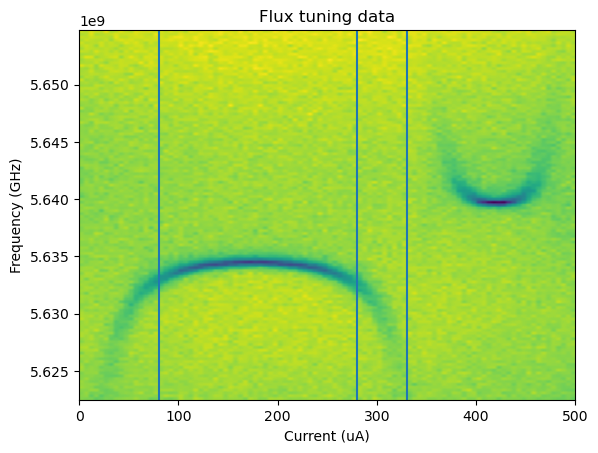

In [2]:
currents = np.linspace(0,500,101)
s21_complex = s21[:,0,:]+1j*s21[:,1,:]
s21_reduced_dim = np.zeros(101)
plt.imshow(abs(s21_complex), aspect='auto',origin='lower',extent=(currents[0], currents[-1], freqs[0], freqs[-1]))
print(np.shape(s21_complex[:,:]))
plt.figure
fstart=270
fstop=400
s21_cut = s21_complex[fstart:fstop,:]
s21_cut = s21_cut[:,1:101]
currents_cut = currents[1:101]
print(np.shape(currents_cut))
freqs_cut = freqs[fstart:fstop]
plt.imshow(abs(s21_cut), aspect='auto',origin='lower',extent=(currents[0], currents[-1], freqs_cut[0], freqs_cut[-1]))
plt.title('Flux tuning data')
plt.xlabel('Current (uA)')
plt.ylabel('Frequency (GHz)')

plt.axvline(currents_cut[65])
plt.axvline(currents_cut[15])
plt.axvline(currents_cut[55])

In [3]:
s21_resfit = np.zeros(100)
for i in range(100):
    print(i)
    res = Resonator(port_type='notch',f_data=freqs_cut,z_data=s21_cut[:,i])
    #plt.plot(freqs_cut,s21_cut[:,i+50])
    plt.show()
    #if i < 15:
    #    res.autofit()
    if i < 65:
        res.autofit(fcrop=(5.620,5.648))
    else:
        res.autofit(fcrop=(5.63,5.650))
    s21_resfit[i] = res.f0
    #res.show()

0
fit error = [0.00777363 1.43433544 1.56308167]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
1
fit error = [-1.43755739e+17  1.07716651e+16  6.30419171e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
2
fit error = [1.80837297e+15 2.62283852e+13 5.28486232e+27]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
3
fit error = [5.83117905e-05 3.17804806e+00 3.23301547e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
4
fit error = [9.98190291e+08 2.09017770e+11 2.81407192e+23]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
5
fit error = [8.59477244e+19 1.12329567e+19 7.22145958e+37]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
6
fit error = [7.91072848e+11 2.08619138e+13 2.17730066e+26]
The fit could not be found, try cropping t

C:\Users\LFL\Anaconda3\envs\opx-env2\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\LFL\Anaconda3\envs\opx-env2\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)


fit error = [2.19194881e-04 3.30794114e+00 4.15012134e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
11
12
fit error = [8.13200254e-05 7.06787633e+00 9.41568495e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
13
14
15
16
17
18
fit error = [4.92812087e-05 1.93619227e-01 3.23717245e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
fit error = [1.53461496e-05 1.48146077e-01 3.14889405e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
46
47
48
49
50
51
52
53
54
55
56
57
fit error = [3.69462467e-05 3.59387439e-01 4.48306565e-01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
58
59
60
fit error = [1.22734010e-04 8.82653479e-01 8.78220074e-01]
The fit could not be found, try cropping the d

C:\Users\LFL\Anaconda3\envs\opx-env2\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


fit error = [9.92787375e-01 1.39114862e+04 6.80135768e+08]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
68
fit error = [3.50083140e-02 3.75623698e+03 1.46153247e+07]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
69
fit error = [3.31879075e+11 1.93045982e+13 7.23769198e+26]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
70
fit error = [  0.15214192  13.75721674 139.3736149 ]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
71
fit error = [ 0.05481668  8.46944264 11.18151692]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
72
fit error = [0.00441913 1.4717521  1.4270146 ]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
73
74
fit error = [1.02629397e-04 2.84215674e-01 3.38037694e-01]
The fit could not be found, try cropping the data wit

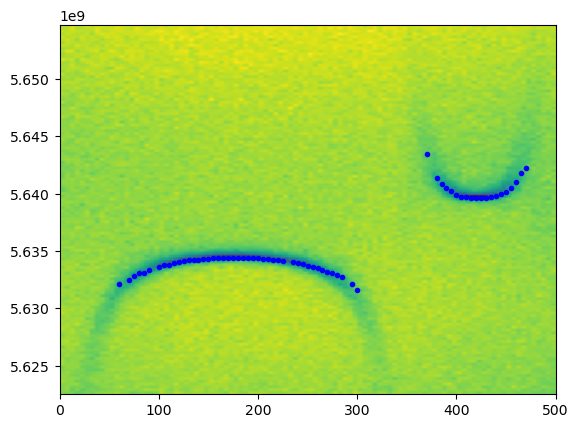

C:\Users\LFL\Anaconda3\envs\opx-env2\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


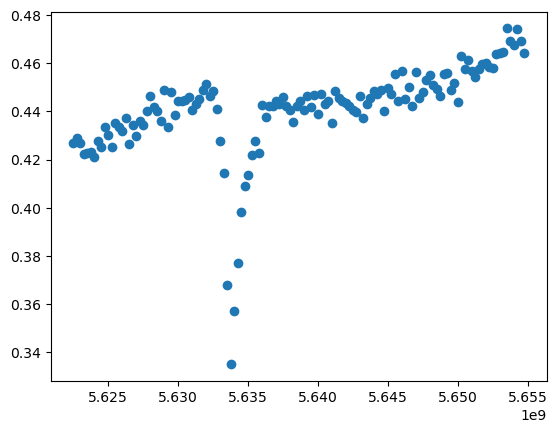

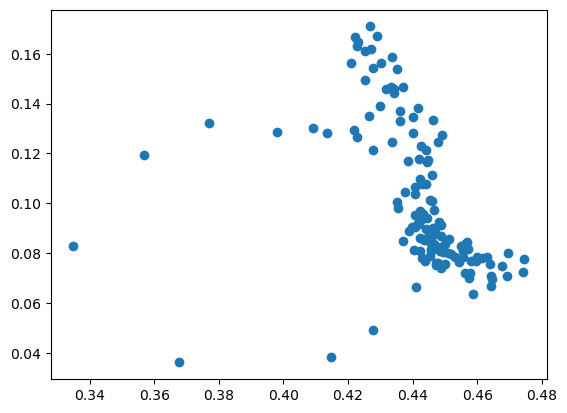

In [4]:
plt.imshow(abs(s21_cut), aspect='auto',origin='lower',extent=(currents[0], currents[-1], freqs_cut[0], freqs_cut[-1]))
plt.scatter(currents_cut,s21_resfit,marker='.',c='blue')
plt.show()
plt.figure()
plt.scatter(freqs_cut,s21_cut[:,20])
plt.figure()
plt.scatter(np.real(s21_cut[:,20]),np.imag(s21_cut[:,20]))

Channels
Data
Instrument config
Instruments
Log list
Settings
Step config
Step list
Tags
Traces
Views
Agilent Network Analyzer - S21
Agilent Network Analyzer - S21_N
Agilent Network Analyzer - S21_t0dt
Time stamp
(1501, 151)


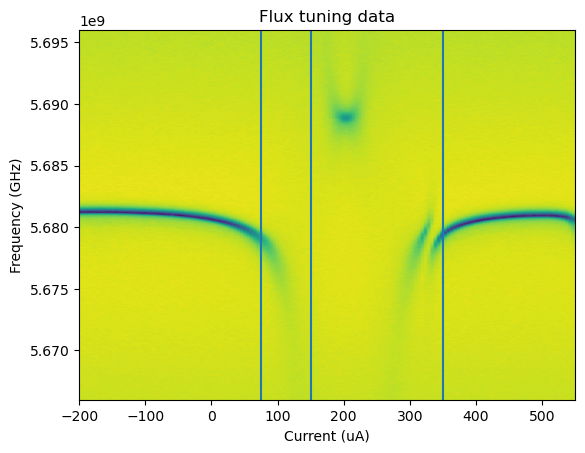

In [5]:
##DEVICE 07A

import math
datapath = 'G:\\Shared drives\\Labber\\Data\\2023\\02\\Data_0224\\'
f_name = 'diss08_07A_FluxSweep_4.hdf5'

f = h5py.File(datapath + f_name,'r')

for key in f.keys():
    print(key)
    #print(type(f[key]))
#print('break')
#print(f['Data']['Data'])
for key in f['Traces'].keys():
    print(key)

    
s21 = f['Traces']['Agilent Network Analyzer - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer - S21_t0dt'][0][()]
currents = np.linspace(-200,550,151)
#guess_current = np.linspace(f['Data']['Data'])
s21_complex = s21[:,0,:]+1j*s21[:,1,:]
freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps)
plt.imshow(abs(s21_complex), aspect='auto',origin='lower',extent=(currents[0], currents[-1], freqs[0], freqs[-1]))
plt.title('Flux tuning data')
plt.xlabel('Current (uA)')
plt.ylabel('Frequency (GHz)')


s21_reduced_dim = np.zeros(151)
plt.imshow(abs(s21_complex), aspect='auto',origin='lower',extent=(currents[0], currents[-1], freqs[0], freqs[-1]))
print(np.shape(s21_complex[:,:]))
plt.figure

plt.axvline(currents[55])
plt.axvline(currents[70])
plt.axvline(currents[110])


In [6]:
print(np.size(freqs))

1501


In [7]:
s21_resfit = np.zeros(151)
for i in range(151):
    print(i)
    res = Resonator(port_type='notch',f_data=freqs,z_data=s21_complex[:,i])
    if i==87 or (i>60 and i<70):
        s21_resfit[i] = 'nan'
    elif i>70 and i<110 and i!=87:
        res.autofit(fcrop=(5.683,5.695))
        s21_resfit[i] = res.f0
    else:
        res.autofit()
        s21_resfit[i] = res.f0


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
fit error = [7.93592002e+15 3.18963161e+14 5.26040238e+29]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
71
fit error = [nan nan nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
72


C:\Users\LFL\lflPython\fitTools\Resonator.py:317: RuntimeWarning: invalid value encountered in arcsin
  self.phi0_2 = -np.arcsin(yc/r0)
C:\Users\LFL\lflPython\fitTools\circlefit.py:423: RuntimeWarning: invalid value encountered in true_divide
  u = u/chi  # unit vector pointing in the correct direction for the derivative


fit error = [nan nan nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
73
fit error = [nan nan nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
74
fit error = [1.32288091e-04 8.65207414e+01 3.16606701e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
75
fit error = [1.18420845e+15 6.83497881e+14 1.99515872e+29]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
76
77
78
79
80
81
82
83
84
85
86
87
88
fit error = [1.77520460e-04 5.29940300e+01 7.14955351e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
89
fit error = [-8.08359629e+16  2.39121604e+16  2.94580334e+31]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
90
fit error = [nan nan nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))

C:\Users\LFL\lflPython\fitTools\Resonator.py:368: RuntimeWarning: invalid value encountered in sqrt
  errors = np.sqrt(np.diagonal(cov))
C:\Users\LFL\lflPython\fitTools\Resonator.py:378: RuntimeWarning: invalid value encountered in sqrt
  Qi_err =  np.sqrt(err1+2*err2)	 # including correlations


fit error = [2.16479486e-05 2.15768001e+01 2.32639252e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
97
fit error = [nan nan nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
98
fit error = [ 2.75694947e+10 -2.14581198e+06 -1.58490852e+12]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
99
fit error = [1.27762618e+21 1.30195584e+19 1.26155531e+39]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
100
fit error = [1.00890447e-03 3.70029567e+02 1.58000418e+04]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
101
fit error = [3.18017842e-04 2.29459321e+02 2.74894523e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
102
fit error = [-3.54467101e+15  1.87328397e+14  8.16541769e+28]
The fit could not be found, try cropping the data wit

In [8]:
print(res)

Frequency: 5.6807 GHz
Total Q: 9859
Internal Q: 15815
Coupling Q: 26178
FWHM: 0.57621 MHz
Kappa: 3.62043 MHz
Single Photon Power: -140.4 dBm
Ringdown Time: 0.383 us
Impedance Mismatch -14.715 degrees
Electrical Delay: -0.164067 ns
SNR: 586.6


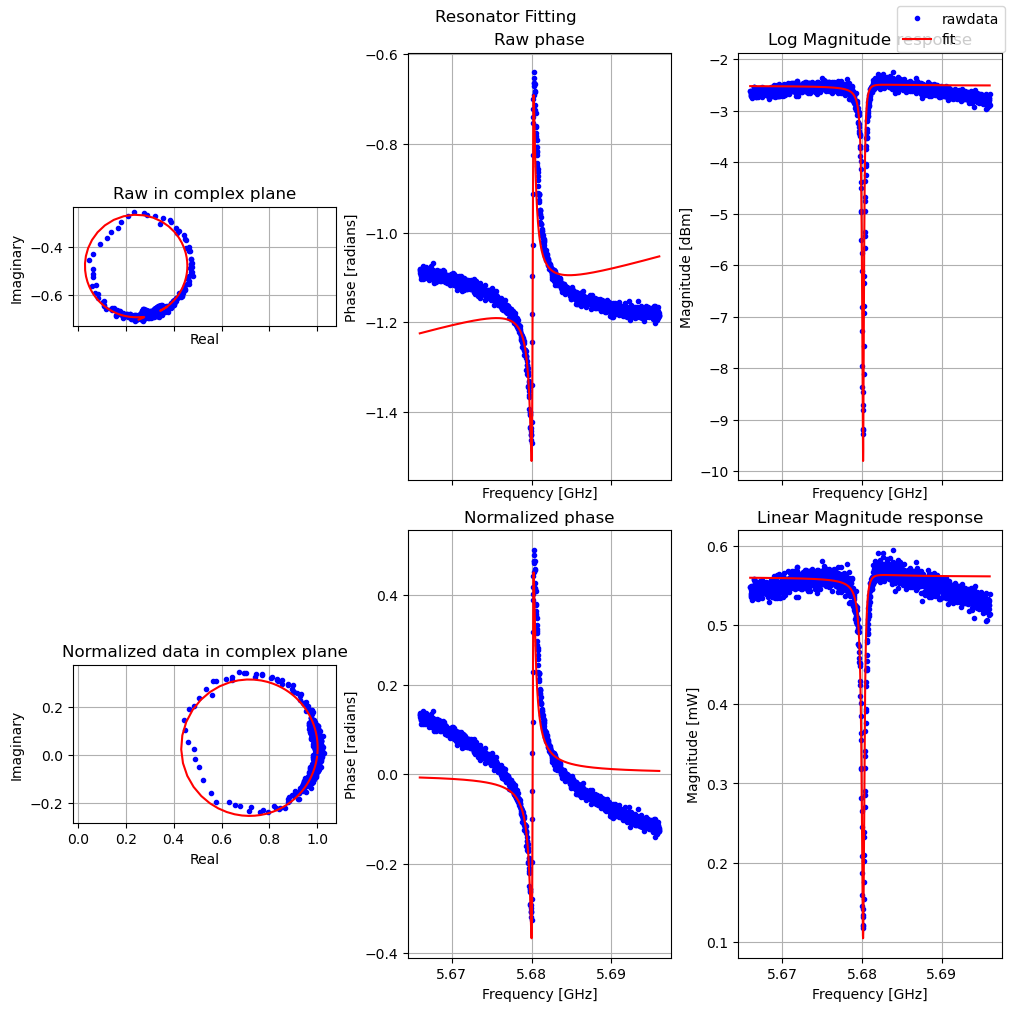

In [9]:
res = Resonator(port_type='notch',f_data=freqs,z_data=s21_complex[:,115])
res.autofit()
s21_resfit[i] = res.f0
res.show()

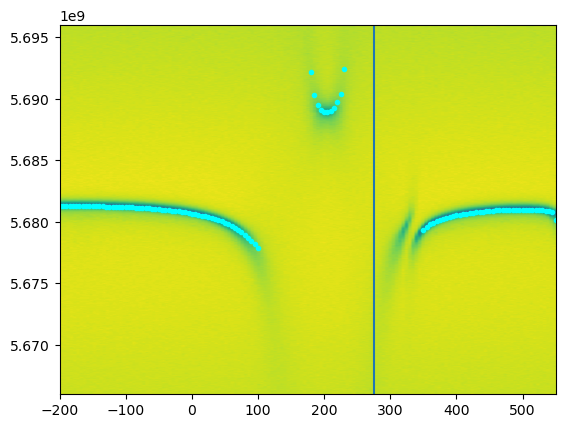

In [10]:
import cmath
plt.clf
plt.imshow(abs(s21_complex), aspect='auto',origin='lower',extent=(currents[0], currents[-1], freqs[0], freqs[-1]))
plt.scatter(currents,s21_resfit,marker='.',c='cyan')
#plt.ylim([5.685e9,5.695e9])
plt.axvline(currents[95])

Text(0, 0.5, 'Frequency (Hz)')

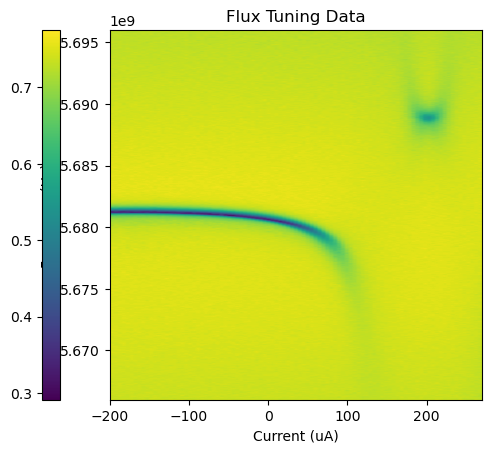

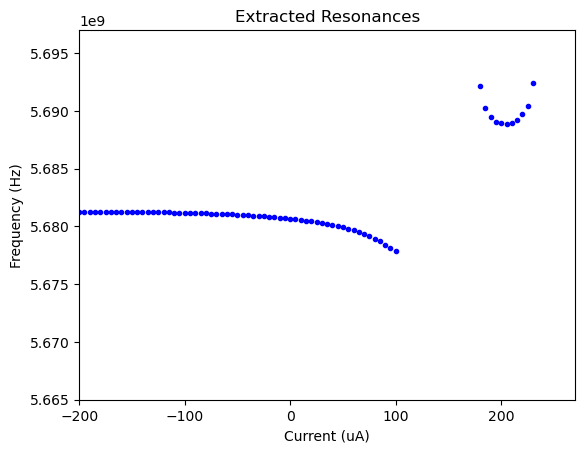

In [11]:
s21cut = s21_complex[:,0:95]
ccut = currents[0:95]
s21fitcut = s21_resfit[0:95]
plt.imshow(abs(s21cut),aspect='auto',origin='lower',extent=(ccut[0], ccut[-1], freqs[0], freqs[-1]))
plt.title('Flux Tuning Data')
plt.xlabel('Current (uA)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(location='left')
#plt.scatter(ccut,s21fitcut,marker='.',c='blue')

plt.figure()
plt.scatter(ccut,s21fitcut,marker='.',c='blue')
plt.ylim([5.665e9,5.697e9])
plt.xlim([-200,ccut[94]])
plt.title('Extracted Resonances')
plt.xlabel('Current (uA)')
plt.ylabel('Frequency (Hz)')
#plt.axvline([ccut[60]]) #lower curve
#plt.axvline([ccut[76]])
#plt.axvline([ccut[86]])

(72,)
Wq_max = 11.074339151454915 GHz
Wc = 5.682758436728341 GHz
g = 0.11142954490095806 GHz
phi_offset = -0.5823076866817534
d (junction asymmetry) = 0.0695722757876979
R^2 of fit =  0.9986202374344498


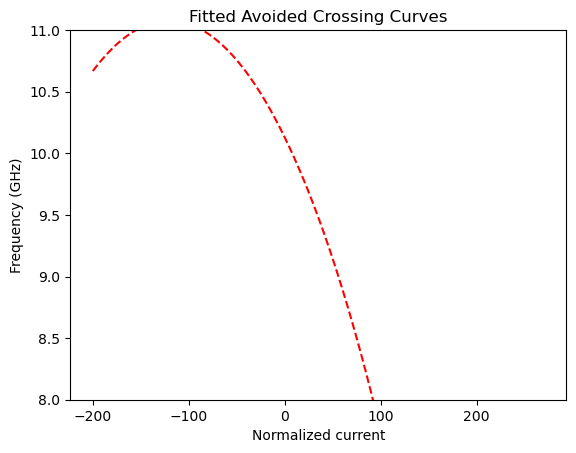

In [29]:
x = ccut/650
y = s21fitcut/1e9
mask = np.isnan(y)
fitx = x[~mask]
fity=y[~mask]
plt.scatter(fitx,fity,marker='.',c='blue')
print(np.shape(fitx))
#plt.axvline(fitx[60])
def avoided_crossing(x, wq_max, wc, g,phi_offset,d):
    
    y = np.zeros(len(x))
    for i in range(len(x)):
        flux_dep = np.emath.power(abs(np.cos(np.pi*x[i]-phi_offset)),2) + d**2*np.emath.power(abs(np.sin(np.pi*x[i]-phi_offset)),2)
        wq = wq_max*np.emath.power(flux_dep, 1/4)
        if i<=60:
            y[i] = 1/2*(-np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))
        else:
            y[i] = 1/2*(np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))
    return y

popt, pcov = curve_fit(avoided_crossing,fitx,fity,p0=[10,5.6825,.09,-.5,.005])#,p0=[10,6.745,.005,1],bounds=(0,[12,7,2,1]))
#print(popt)
#get r^2
residuals = fity-avoided_crossing(fitx,*popt)
ss_res = np.sum(residuals**2) #residual sum of squares
ss_tot = np.sum((fity - np.mean(fity))**2) #total sum of squares
r_squared = 1 - (ss_res/ss_tot)

def avoided_crossing_lower(x, wq_max, wc, g,phi_offset,d):
    flux_dep = np.emath.power(abs(np.cos(np.pi*x-phi_offset)),2) + d**2*np.emath.power(abs(np.sin(np.pi*x-phi_offset)),2)
    wq = wq_max*np.emath.power(flux_dep, 1/4)
    return 1/2*(-np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))

def avoided_crossing_upper(x, wq_max, wc, g, phi_offset,d):
    flux_dep = np.emath.power(abs(np.cos(np.pi*x-phi_offset)),2) + d**2*np.emath.power(abs(np.sin(np.pi*x-phi_offset)),2)
    wq = wq_max*np.emath.power(flux_dep, 1/4)
    return 1/2*(np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))

plt.plot(x*650,avoided_crossing_lower(x,*popt),'r--')
plt.plot(x*650,avoided_crossing_upper(x,*popt),'r--')
plt.ylim([8,11])
plt.title('Fitted Avoided Crossing Curves')
print("Wq_max = "+str(popt[0])+" GHz")
print("Wc = "+str(popt[1])+" GHz")
print("g = "+str(popt[2])+" GHz")
print("phi_offset = "+str(popt[3]))
print("d (junction asymmetry) = "+str(popt[4]))
print("R^2 of fit = ",r_squared)
plt.xlabel('Normalized current')
plt.ylabel('Frequency (GHz)')
plt.show()

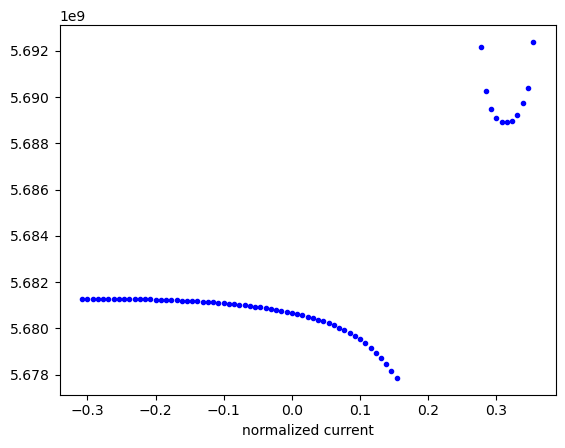

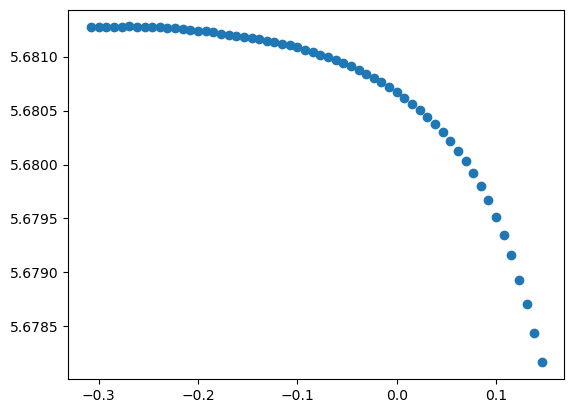

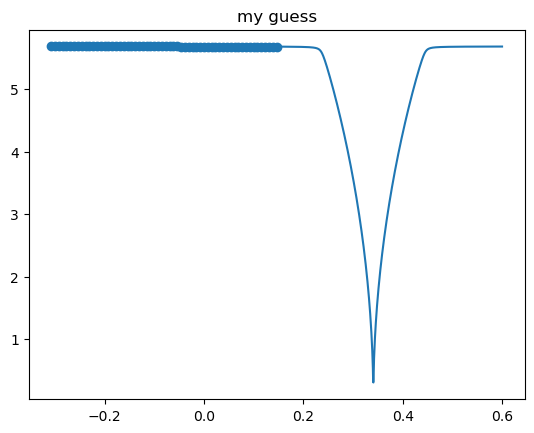

[308.11993357   5.68261164   3.34791583  -0.80799562]


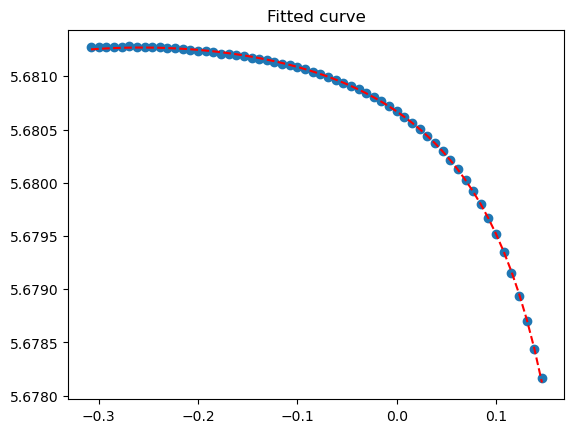

In [20]:
from scipy.optimize import curve_fit
from lmfit import minimize
import math

cnorm=ccut/650
plt.scatter(cnorm,s21fitcut,marker='.',c='blue')
plt.xlabel('normalized current')
plt.figure()
fit_x=cnorm[0:60]
fit_y=s21fitcut[0:60]/1e9
plt.scatter(fit_x,fit_y)
# ctrl /
# def avoided_crossing_lower_rwa(x, wq_max, wc, g,phi_offset):
#     wq = wq_max*np.emath.sqrt(abs( (np.cos(np.pi*x-phi_offset))))
#     return 1/2*((wc+wq)-np.emath.sqrt(4*g**2+(wc-wq)**2) )

# def avoided_crossing_upper_rwa(x, wq_max, wc, g, phi_offset):
#     wq = wq_max*np.emath.sqrt(abs(np.cos(np.pi*x-phi_offset)))
#     return 1/2*((wc+wq)+np.emath.sqrt(4*g**2+(wc-wq)**2) )

def avoided_crossing_lower(x, wq_max, wc, g,phi_offset):
    wq = wq_max*np.emath.sqrt(abs( (np.cos(np.pi*x-phi_offset))))
    return 1/2*(-np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))

def avoided_crossing_upper(x, wq_max, wc, g, phi_offset):
    wq = wq_max*np.emath.sqrt(abs(np.cos(np.pi*x-phi_offset)))
    return 1/2*(np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))
x = np.linspace(0,0.6,1000)

#plt.plot(x,avoided_crossing_upper(x,10e9,5.682e9,.09,0))
#plt.plot(x,avoided_crossing_lower(x,10e9,5.682e9,.09,0))

plt.show()
plt.scatter(fit_x,fit_y)
plt.plot(x,avoided_crossing_lower(x,10,5.6825,.09,-.5))

plt.title('my guess')
#plt.ylim([5.6780,5.6815])
plt.show()

plt.figure()
plt.scatter(fit_x,fit_y)
popt, pcov = curve_fit(avoided_crossing_lower,fit_x,fit_y,p0=[10,5.6825,.09,-.5])#,p0=[10,6.745,.005,1],bounds=(0,[12,7,2,1]))
print(popt)
plt.plot(fit_x,avoided_crossing_lower(fit_x,*popt),'r--')
plt.title('Fitted curve')
plt.show()

#plt.plot(x*650,)

[5.69218074 5.69025948 5.68947211 5.68907451 5.68894176 5.68891315
 5.68897693 5.68920983 5.68973954 5.69039506]


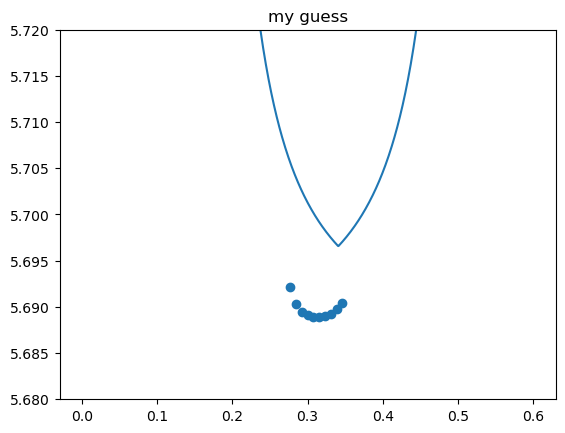

[15.00134024  5.68808807  0.04575861 -0.58245863]


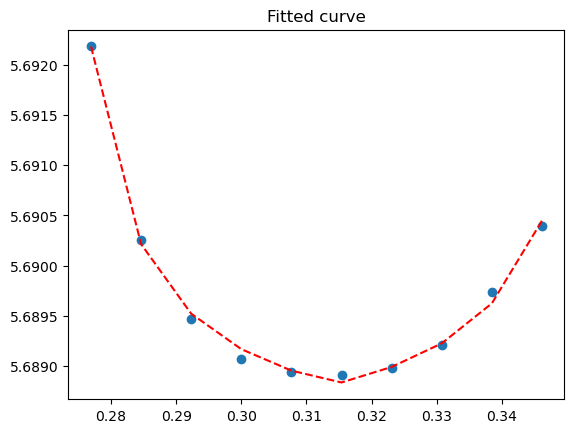

In [90]:
x_up = cnorm[76:86]
y_up = s21fitcut[76:86]/1e9
plt.scatter(x_up,y_up)
plt.plot(x,avoided_crossing_upper(x,8,5.6825,.2,-.5))
print(y_up)
plt.title('my guess')
plt.ylim([5.68,5.72])
plt.show()

plt.figure()
plt.scatter(x_up,y_up)
popt, pcov = curve_fit(avoided_crossing_upper,x_up,y_up,p0=[10,5.6825,.2,-.5])#,p0=[10,6.745,.005,1],bounds=(0,[12,7,2,1]))
print(popt)
plt.plot(x_up,avoided_crossing_upper(x_up,*popt),'r--')
plt.title('Fitted curve')
plt.show()

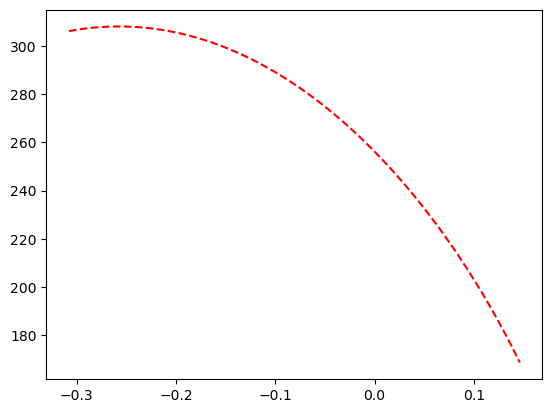

In [32]:
def predict_disspator_frequency(x,wq_max,wc,g,phi_offset,d):
    flux_dep = np.emath.power(abs(np.cos(np.pi*x-phi_offset)),2) + d**2*np.emath.power(abs(np.sin(np.pi*x-phi_offset)),2)
    wq = wq_max*np.emath.power(flux_dep, 1/4)
    return wq
avoided_crossing_upper(10/650,*popt)-avoided_crossing_upper(35/650,*popt)

0.48211078287759435